In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib import gridspec

import dataset

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cpu


In [3]:
train_ds = dataset.train()
train_ds = torch.tensor(train_ds, device=device)
train_ds.shape

torch.Size([100, 14, 40, 30])

In [4]:
test_ds = dataset.test()
test_ds = torch.tensor(test_ds, device=device)
test_ds.shape

torch.Size([100, 12, 40, 30])

In [5]:
row_x = [15, 15]
col_x = [10, 26-10, 40-26]

row_p = [0, 15, 30]
col_p = [0, 10, 26, 40, ]


def split4(x: torch.Tensor):
    res = []
    for j in range(len(col_p) - 1):
        for i in range(len(row_p) - 1):
            m = x[:, :, col_p[j]:col_p[j + 1], row_p[i]:row_p[i + 1]]
            res.append(m.contiguous())
    return res


train_ds = split4(train_ds)
test_ds = split4(test_ds)


In [10]:
clazz = 87
im = 1

In [11]:
y = []
for b in test_ds:
    y.append(b[clazz, im, :, :])


In [8]:
def plot_blocks(arr, nrows, ncols):
    fig = plt.figure(figsize=(8, 6))
    gs = gridspec.GridSpec(nrows, ncols,
                           width_ratios=row_x,
                           height_ratios=col_x)
    for i, b in enumerate(arr):
        ax_i = plt.subplot(gs[i])
        ax_i.imshow(b, cmap='gray')
        ax_i.axis('off')
    # plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout(pad=0.1)
    plt.show()


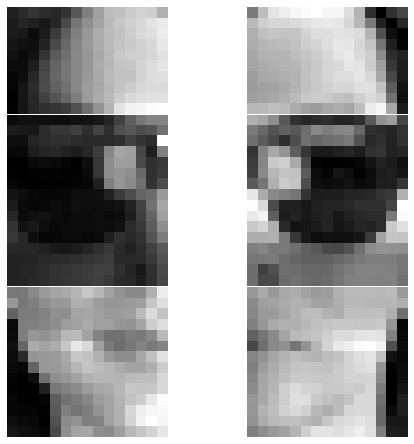

In [12]:
plot_blocks(y, 3, 2)